In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## **Part 2-  Model Trainning**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

df_players = pd.read_csv("preprocessed_data_v1.csv")
df_players.head()

,Name,Age,Overall,Club,Value(£),Age_Group,Overall_Group,Log_Value,Age_Rating
0,L. Goretzka,0.834593,2.940553,FC Bayern München,11.256167,26-30,81-90,2.245328,1.938783
1,Bruno Fernandes,0.834593,2.816114,Manchester United,9.661994,26-30,81-90,2.177662,1.877999
2,M. Acuña,1.481188,2.691675,Sevilla FC,5.580910,31-35,81-90,1.937863,2.391289
3,K. De Bruyne,1.696720,3.438311,Manchester City,13.360476,31-35,91-100,2.321635,3.001384
4,N. Barella,0.403530,2.816114,Inter,11.064866,26-30,81-90,2.237716,1.490780


**Choose model**

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib

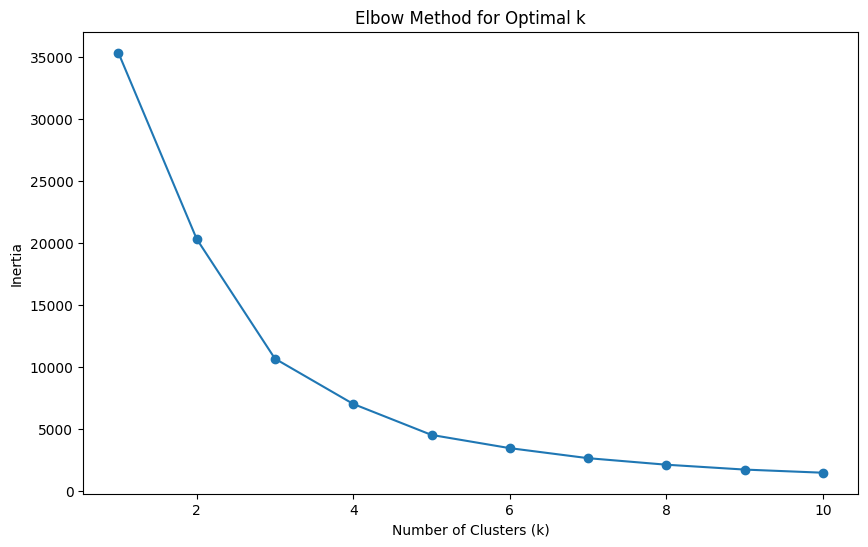

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


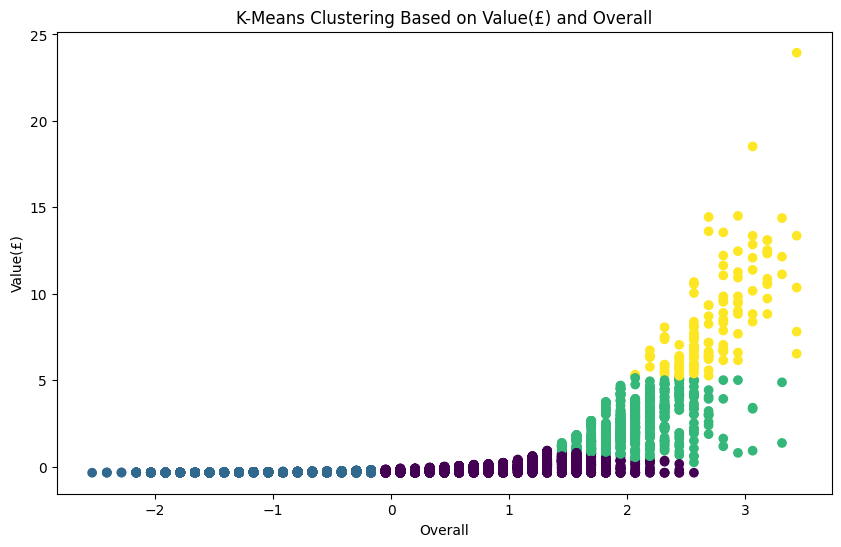

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering (based on 'Value(£)' and 'Overall')
features_for_clustering = ['Value(£)', 'Overall']

# Standardize the features
X = df_players[features_for_clustering]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Elbow Method to find optimal k
inertia = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_standardized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal value of k based on the elbow method analysis
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_players['Cluster_Labels'] = kmeans.fit_predict(X_standardized)

# Visualize clusters using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_players['Overall'], df_players['Value(£)'], c=df_players['Cluster_Labels'], cmap='viridis')
plt.title('K-Means Clustering Based on Value(£) and Overall')
plt.xlabel('Overall')
plt.ylabel('Value(£)')
plt.show()


### **Mesure Metrics**

In [3]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_standardized, df_players['Cluster_Labels'])
print(f"Davies-Bouldin Index: {davies_bouldin}")


Davies-Bouldin Index: 0.5795745199401067


In [7]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_standardized, df_players['Cluster_Labels'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5362110653971716


In [4]:
cluster_counts = df_players['Cluster_Labels'].value_counts().sort_index()

# Compute mean values for each cluster
cluster_means = df_players.groupby('Cluster_Labels').mean()[['Value(£)', 'Overall']]

# Visualize cluster characteristics
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
# Use cluster counts for the y-axis
sns.barplot(x=cluster_counts.index, y=cluster_counts)
plt.title('Number of Rows in Each Cluster')

plt.subplot(2, 1, 2)
# Use cluster means for the y-axis
sns.barplot(x=cluster_means.index, y=cluster_means['Overall'])
plt.title('Average Overall Rating for Each Cluster')

plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [9]:
print("Cluster Characteristics (Mean Values):")
print(cluster_means)

Cluster Characteristics (Mean Values):
                Value(£)   Overall
Cluster_Labels                    
0              -0.295374 -0.743313
1              -0.053640  0.699988
2               8.492284  2.732521
3               2.219607  1.958777


In [6]:

print("DataFrame with Cluster Assignment:")
print(df_players[['Name', 'Value(£)', 'Overall', 'Cluster_Labels']])


DataFrame with Cluster Assignment:
                  Name   Value(£)   Overall  Cluster_Labels
0          L. Goretzka  11.256167  2.940553               3
1      Bruno Fernandes   9.661994  2.816114               3
2             M. Acuña   5.580910  2.691675               3
3         K. De Bruyne  13.360476  3.438311               3
4           N. Barella  11.064866  2.816114               3
...                ...        ...       ...             ...
17655    Deng Xiongtao  -0.336662 -1.912583               1
17656   22 Lim Jun Sub  -0.336662 -1.912583               1
17657         A. Demir  -0.340488 -1.539264               1
17658     21 S. Czajor  -0.337938 -1.663704               1
17659  21 F. Jakobsson  -0.337938 -1.663704               1

[17660 rows x 4 columns]


In [7]:
# Add a unique and incremented playerId column
df_players['playerId'] = range(1, len(df_players) + 1)

# Display the updated players dataset
print(df_players)


                  Name       Age   Overall               Club   Value(£)  \
0          L. Goretzka  0.834593  2.940553  FC Bayern München  11.256167   
1      Bruno Fernandes  0.834593  2.816114  Manchester United   9.661994   
2             M. Acuña  1.481188  2.691675         Sevilla FC   5.580910   
3         K. De Bruyne  1.696720  3.438311    Manchester City  13.360476   
4           N. Barella  0.403530  2.816114              Inter  11.064866   
...                ...       ...       ...                ...        ...   
17655    Deng Xiongtao -0.889660 -1.912583      Meizhou Hakka  -0.336662   
17656   22 Lim Jun Sub -1.320723 -1.912583     Jeju United FC  -0.336662   
17657         A. Demir  0.403530 -1.539264       Ümraniyespor  -0.340488   
17658     21 S. Czajor -1.105192 -1.663704     Fleetwood Town  -0.337938   
17659  21 F. Jakobsson -0.674128 -1.663704     IFK Norrköping  -0.337938   

      Age_Group Overall_Group  Log_Value  Age_Rating  Cluster_Labels  playerId  
0     

## **Part 3 - Recommendation System**


### **Classify new user**

In [8]:
def classify_and_add_user(new_user_df, players_df, kmeans_model, scaler_model):
    # Check if the DataFrame is empty
    if players_df.empty:
        # If empty, assign the new user to cluster 0
        new_user_df['Cluster_Labels'] = 0
        # Add the new user to the players DataFrame
        players_df = pd.concat([players_df, new_user_df], ignore_index=True)
    else:
        # Check if the new user already exists in the players DataFrame
        existing_user = players_df[players_df['Name'] == new_user_df['Name'].iloc[0]]

        if not existing_user.empty:
            # If the user exists, update the information (if needed)
            # For simplicity, let's assume we don't need to update any information
            print(f"User '{new_user_df['Name'].iloc[0]}' already exists in the dataset.")
        else:
            # Standardize the features of the new user
            new_user_std = scaler_model.transform(new_user_df[['Value(£)', 'Overall']])

            # Predict the cluster label for the new user
            cluster_label = kmeans_model.predict(new_user_std)[0]

            # Add the new user to the players DataFrame with the predicted cluster label
            new_user_df['Cluster_Labels'] = cluster_label
            players_df = pd.concat([players_df, new_user_df], ignore_index=True)

    # players_df = players_df.sort_values(by='Value(£)')

    return players_df


In [9]:
new_user_data = {
    'Name': 'New Player',
    'Age': 25,
    'Overall': 80,
    'Value(£)': 4000000,
    'playerId': len(df_players) + 1
}



In [10]:
df_players = classify_and_add_user(pd.DataFrame([new_user_data]), df_players, kmeans, scaler)
# print(df_players.info())
df_players

,Name,Age,Overall,Club,Value(£),Age_Group,Overall_Group,Log_Value,Age_Rating,Cluster_Labels,playerId
0,L. Goretzka,0.834593,2.940553,FC Bayern München,1.125617e+01,26-30,81-90,2.245328,1.938783,3,1
1,Bruno Fernandes,0.834593,2.816114,Manchester United,9.661994e+00,26-30,81-90,2.177662,1.877999,3,2
2,M. Acuña,1.481188,2.691675,Sevilla FC,5.580910e+00,31-35,81-90,1.937863,2.391289,3,3
3,K. De Bruyne,1.696720,3.438311,Manchester City,1.336048e+01,31-35,91-100,2.321635,3.001384,3,4
4,N. Barella,0.403530,2.816114,Inter,1.106487e+01,26-30,81-90,2.237716,1.490780,3,5
...,...,...,...,...,...,...,...,...,...,...,...
17656,22 Lim Jun Sub,-1.320723,-1.912583,Jeju United FC,-3.366625e-01,15-20,40-50,-0.874824,-1.512419,1,17657
17657,A. Demir,0.403530,-1.539264,Ümraniyespor,-3.404885e-01,26-30,51-60,-1.038158,-0.479084,1,17658
17658,21 S. Czajor,-1.105192,-1.663704,Fleetwood Town,-3.379378e-01,15-20,51-60,-0.923072,-1.323312,1,17659
17659,21 F. Jakobsson,-0.674128,-1.663704,IFK Norrköping,-3.379378e-01,21-25,51-60,-0.923072,-1.098185,1,17660


In [11]:
from datetime import datetime, timedelta

insurances_data = {
    'name': ['Insurance A', 'Insurance B', 'Insurance C', 'Insurance D', 'Insurance E', 'Insurance F', 'Insurance J'],
    'type': ['Normal', 'Premium', 'Deluxe', 'Ultimate', 'Normal', 'Ultimate', 'Ultimate'],
    'description': ['Description A', 'Description B', 'Description C', 'Description D', 'Description E', 'Description F', 'Description J'],
    'price': np.random.randint(1000, 10000, size=7),
    'date': [datetime.now() - timedelta(days=i) for i in range(7)]
}

# Create the insurance DataFrame
df_insurances = pd.DataFrame(insurances_data)

df_insurances['insuranceId'] = range(1, len(df_insurances) + 1)

# Display the updated insurances dataset
print(df_insurances)

          name      type    description  price                       date  \
0  Insurance A    Normal  Description A   9583 2024-01-21 23:54:41.710975   
1  Insurance B   Premium  Description B   4894 2024-01-20 23:54:41.710975   
2  Insurance C    Deluxe  Description C   7969 2024-01-19 23:54:41.710975   
3  Insurance D  Ultimate  Description D   6233 2024-01-18 23:54:41.710975   
4  Insurance E    Normal  Description E   6935 2024-01-17 23:54:41.710975   
5  Insurance F  Ultimate  Description F   2922 2024-01-16 23:54:41.710975   
6  Insurance J  Ultimate  Description J   6444 2024-01-15 23:54:41.710975   

   insuranceId  
0            1  
1            2  
2            3  
3            4  
4            5  
5            6  
6            7  


### **User-item collaborative filltering**

In [14]:

def insurance_of_cluser_players(player_id, df_players, df_insurances):
    # Find the cluster to which the player belongs
    player_cluster = df_players.loc[df_players['Name'] == player_id, 'Cluster_Labels'].values[0]

    # Retrieve all players from the same cluster
    similar_players = df_players[df_players['Cluster_Labels'] == player_cluster]

    # print(similar_players)

    # Assign insurance type based on the player's cluster
    cluster_type_mapping = {0: 'Normal', 1: 'Premium', 2: 'Deluxe', 3: 'Ultimate'}
    player_insurance_type = cluster_type_mapping.get(player_cluster)

    # Filter insurances based on the assigned type for the player's cluster
    recommended_insurances = df_insurances[df_insurances['type'] == player_insurance_type]

    return recommended_insurances

In [15]:
player_name = 'New Player'

# Get recommended insurances for the active player
cluster_insurances = insurance_of_cluser_players(player_name, df_players, df_insurances)

# print(cluster_insurances.insuranceId)

# Get similar players from the same cluster
player_cluster = df_players.loc[df_players['Name'] == player_name, 'Cluster_Labels'].values[0]
similar_players = df_players[df_players['Cluster_Labels'] == player_cluster]


ratings_data = {
    'playerId': np.random.choice(similar_players.playerId, size=200),
    'insuranceId': np.random.choice(cluster_insurances.insuranceId, size=200),
    'rating': np.random.randint(1, 6, size=200),
    'timestamp': [datetime.now() - timedelta(days=i) for i in range(200)]
}

# Create the ratings DataFrame
df_ratings = pd.DataFrame(ratings_data)


# Create the user-item matrix
user_item_matrix = pd.pivot_table(df_ratings, values='rating', index='playerId', columns='insuranceId', fill_value=0)

# Display the user-item matrix
print(user_item_matrix)
# print(user_item_matrix.info())


insuranceId    4         6    7
playerId                       
1            2.0  0.000000  5.0
2            0.0  5.000000  0.0
3            0.0  5.000000  2.0
5            0.0  2.000000  5.0
6            3.0  0.000000  0.0
...          ...       ...  ...
13507        0.0  0.000000  5.0
14358        1.0  1.000000  2.0
15430        0.0  2.666667  2.0
15638        0.0  4.000000  0.0
17661        0.0  0.000000  1.0

[112 rows x 3 columns]


In [16]:
from sklearn.neighbors import NearestNeighbors

# Fit NearestNeighbors
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(user_item_matrix)


def find_candidate_items(player_id, neighbors_model, user_item_matrix, df_ratings):
    # Check if the player exists in the dataset

    if player_id not in df_ratings['playerId'].unique():
        print(f"Player with ID {player_id} not found.")
        return []

    # Map the player ID to the corresponding index in user_item_matrix
    player_indices = user_item_matrix.index.get_indexer_for([player_id])

    # print(player_indices)
    # # Check if player_indices is empty
    # if not player_indices or player_indices[0] == -1:
    #     print(f"Player with ID {player_id} not found in user_item_matrix.")
    #     return []

    # Query for neighbors
    _, neighbor_indices = neighbors_model.kneighbors([user_item_matrix.iloc[player_indices[0]]], n_neighbors=5)

    # Flatten the array of neighbor indices
    neighbor_indices = neighbor_indices.flatten()

    # Filter ratings for similar users
    similar_users_ratings = df_ratings[df_ratings.index.isin(neighbor_indices)]

    # Sort items in decreasing order of frequency
    frequency = similar_users_ratings.groupby('insuranceId')['rating'].count().reset_index(name='count').sort_values(['count'], ascending=False)
    candidate_items = frequency['insuranceId'].tolist()

    # Exclude items already rated by the active player
    active_player_ratings = df_ratings[df_ratings['playerId'] == player_id]['insuranceId'].tolist()
    candidate_items = [item for item in candidate_items if item not in active_player_ratings]

    # Return the top 5 candidate items
    return candidate_items[:5]

player_id = 1  # Use the actual playerId as an integer
candidates = find_candidate_items(player_id, nn_model, user_item_matrix, df_ratings)
print("Candidate Items:", candidates)



Candidate Items: [6]


In [18]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

cosine_sim = cosine_similarity(user_item_matrix)

# Step 1: Rating Prediction
def predict_ratings(active_player_index, user_item_matrix, cosine_sim, candidates):
    # Get the similarity scores for all players
    sim_scores = list(enumerate(cosine_sim[active_player_index]))

    # Sort the players based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of similar players
    similar_players_indices = [x[0] for x in sim_scores]

    # Get the ratings of the active player
    active_player_ratings = user_item_matrix.iloc[active_player_index]

    # Initialize a dictionary to store predicted ratings and total similarity scores
    predicted_ratings = {}
    total_similarity_scores = {}

    # Iterate over similar players and predict ratings
    for player_index in similar_players_indices:
        if player_index == active_player_index:
            continue  # Skip the active player

        # Get the ratings of the similar player
        similar_player_ratings = user_item_matrix.iloc[player_index]

        # Find items rated by the similar player that are in the candidate list
        candidate_items = set(similar_player_ratings[candidates].index)

        # Predict ratings for candidate items
        for item in candidate_items:
            if item not in predicted_ratings:
                predicted_ratings[item] = 0
                total_similarity_scores[item] = 0

            # Use the similarity score to predict the rating
            predicted_ratings[item] += sim_scores[player_index][1] * similar_player_ratings[item]
            total_similarity_scores[item] += sim_scores[player_index][1]

    # Normalize the predicted ratings between 1 and 5
    for item in predicted_ratings:
        if total_similarity_scores[item] != 0:
            predicted_ratings[item] /= total_similarity_scores[item]
            # Ensure the rating is between 1 and 5
            predicted_ratings[item] = min(5, max(1, predicted_ratings[item]))

    # Sort the predicted ratings in descending order
    predicted_ratings = dict(sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True))

    return predicted_ratings


# Step 2: User-to-User Predictions
def user_to_user_predictions(active_player_id, df_ratings, user_item_matrix, cosine_sim, nn_model):
    # Check if active_player_id exists in the dataset
    if active_player_id not in df_ratings['playerId'].unique():
        print(f"Player with ID {active_player_id} not found.")
        return {}

    # Map the active player ID to the corresponding index in user_item_matrix
    active_player_indices = user_item_matrix.index.get_indexer_for([active_player_id])

    # # Ensure the active player is found in the user_item_matrix
    # if not active_player_indices or active_player_indices[0] == -1:
    #     print(f"Active player with ID {active_player_id} not found in user_item_matrix.")
    #     return {}

    active_player_index = active_player_indices[0]

    # Find candidate items using the updated logic
    candidates = find_candidate_items(active_player_id, nn_model, user_item_matrix, df_ratings)

    # Ensure there are enough similar players to make predictions
    if cosine_sim.shape[0] <= active_player_index:
        return {}

    # Predict ratings based on user similarity
    predicted_ratings = predict_ratings(active_player_index, user_item_matrix, cosine_sim, candidates)

    return predicted_ratings



# Step 3: Top-5 Recommendations
def top_k_recommendations(predicted_ratings, k=5):
    top_recommendations = list(predicted_ratings.keys())[:k]
    return top_recommendations


active_player_id = 13507
predictions = user_to_user_predictions(active_player_id, df_ratings, user_item_matrix, cosine_sim, nn_model)
print("User-to-User Predictions:", predictions)
top_recommendations = top_k_recommendations(predictions, k=10)
print("Top 10 Recommendations:", top_recommendations)


predictions_df = pd.DataFrame(list(predictions.items()), columns=['Insurance', 'Predicted_Rating'])

# Export to CSV
csv_filename = f'predictions_{active_player_id}.csv'
predictions_df.to_csv(csv_filename, index=False)

print(f"Predictions exported to {csv_filename}")


User-to-User Predictions: {4: 1.469939790772155, 6: 1.2414459372147042}
Top 10 Recommendations: [4, 6]
Predictions exported to predictions_13507.csv
